In [1]:
# Dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import seaborn as sb
import numpy as np
import datetime
from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Twitter API Keys
from config import (consumer_key,consumer_secret,access_token,access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [8]:
# Search for People Tweeting about mass transit
search_terms = ("@SFBART","@WMATA","@nyctsubway","@CTA","@MARTASERVICE","@RTCSNV","@UBER","@LYFT")

# Create variable for holding the oldest tweet
oldest_tweet = None

# List to hold unique tweet sentiments
sentiments = []

# Counter to keep track of the number of tweets retrieved
counter = 0

# scroll through each mass transit org
for search_term in search_terms:

    # reset counter and oldest tweet
    counter = 0
    oldest_tweet = None 

    # Loop through 5 times (total of 500 tweets)
    for x in range(10):

        # Retrieve 100 most recent tweets -- specifying a max_id
        public_tweets = api.search(search_term, 
                                   count=100, 
                                   result_type="recent", 
                                   max_id=oldest_tweet)
        # Print Tweets
        for tweet in public_tweets["statuses"]:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

            # Add sentiments for each tweet into a list
            sentiments.append({"Date": tweet["created_at"],
                               "Subject": search_term,
                               "Compound": compound,
                               "Positive": pos,
                               "Neutral": neu,
                               "Negative": neg,
                               "Tweets Ago": counter})

            # Add to counter 
            counter += 1

In [9]:
# Convert sentiments to DataFrame
tweet_df = pd.DataFrame.from_dict(sentiments)
# export to csv
tweet_df.to_csv('twitter.csv', encoding='utf-8')
tweet_df.head(50)
tweet_df.count()

Compound      6816
Date          6816
Negative      6816
Neutral       6816
Positive      6816
Subject       6816
Tweets Ago    6816
dtype: int64

In [3]:
# read in csv
twitter_data = "twitter.csv"
twitter_df = pd.read_csv(twitter_data, encoding="iso-8859-1", low_memory=False)
twitter_df.head()

,Unnamed: 0,Compound,Date,Negative,Neutral,Positive,Subject,Tweets Ago
0,0,0.0000,Tue Apr 17 04:05:42 +0000 2018,1.000,0.000,0.000,@SFBART,0
1,1,-0.5719,Tue Apr 17 03:55:03 +0000 2018,0.712,0.207,0.081,@SFBART,1
2,2,0.1857,Tue Apr 17 03:42:20 +0000 2018,0.882,0.000,0.118,@SFBART,2
3,3,0.0000,Tue Apr 17 03:34:28 +0000 2018,1.000,0.000,0.000,@SFBART,3
4,4,0.4588,Tue Apr 17 03:29:07 +0000 2018,0.850,0.000,0.150,@SFBART,4


In [4]:
# calculate mean score by mass transit
com_df = twitter_df.groupby("Subject")["Compound"].mean()
pos_df = twitter_df.groupby("Subject")["Positive"].mean()
neu_df = twitter_df.groupby("Subject")["Neutral"].mean()
neg_df = twitter_df.groupby("Subject")["Negative"].mean()

summary_breakdown = pd.DataFrame({"Compound":com_df,
                                  "Positive":pos_df, 
                                  "Neutral":neu_df,
                                  "Negative":neg_df})
summary_breakdown

,Compound,Negative,Neutral,Positive
Subject,,,,
@CTA,0.035488,0.879735,0.050910,0.069362
@LYFT,0.237691,0.848970,0.030024,0.121004
@MARTASERVICE,0.107390,0.876783,0.043401,0.079814
@RTCSNV,-0.028831,0.874393,0.068760,0.056830
@SFBART,0.133183,0.860930,0.041599,0.097453
@UBER,-0.000540,0.868699,0.065170,0.066135
@WMATA,-0.028336,0.920565,0.046187,0.033247
@nyctsubway,-0.015800,0.954742,0.026982,0.018275


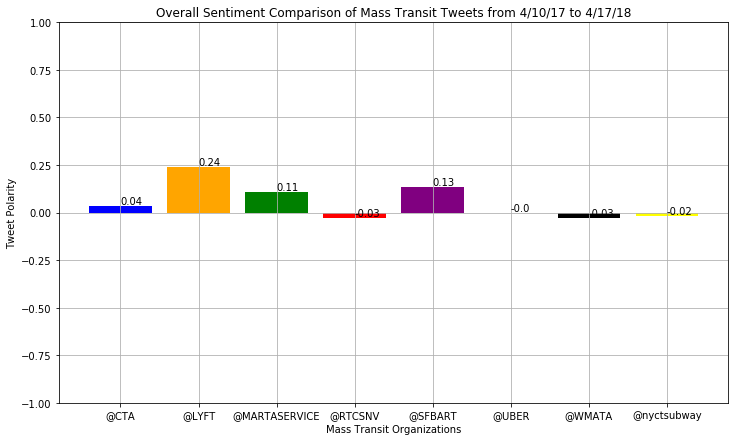

In [8]:
# plot overall sentiment

plt.figure(figsize = (12,7))
plt.ylim(-1,1)
plt.grid()

colors = ["blue", "orange", "green","red","purple","skyblue","black","yellow"]
x_axis = np.arange(len(com_df))
xlabels = com_df.index
count = 0

for com in com_df:
    plt.text(count, com+.01, str(round(com,2)))
    count = count + 1
    
plt.bar(x_axis, com_df, tick_label = xlabels, color = colors)

plt.title("Overall Sentiment Comparison of Mass Transit Tweets from 4/10/17 to 4/17/18")
plt.xlabel("Mass Transit Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall_Sentiment_on_Mass_Trans.png")
plt.show()

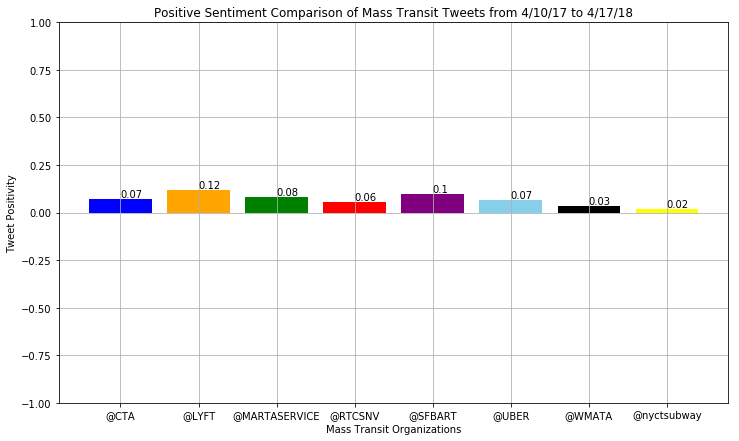

In [10]:
# plot positive sentiment

plt.figure(figsize = (12,7))
plt.ylim(-1,1)
plt.grid()

colors = ["blue", "orange", "green","red","purple","skyblue","black","yellow"]
x_axis = np.arange(len(pos_df))
xlabels = pos_df.index
count = 0

for pos in pos_df:
    plt.text(count, pos+.01, str(round(pos,2)))
    count = count + 1
    
plt.bar(x_axis, pos_df, tick_label = xlabels, color = colors)
#Set title, x axis label, and y axis label.

plt.title("Positive Sentiment Comparison of Mass Transit Tweets from 4/10/17 to 4/17/18")
plt.xlabel("Mass Transit Organizations")
plt.ylabel("Tweet Positivity")
plt.savefig("Positive_Sentiment_on_Mass_Trans.png")
plt.show()

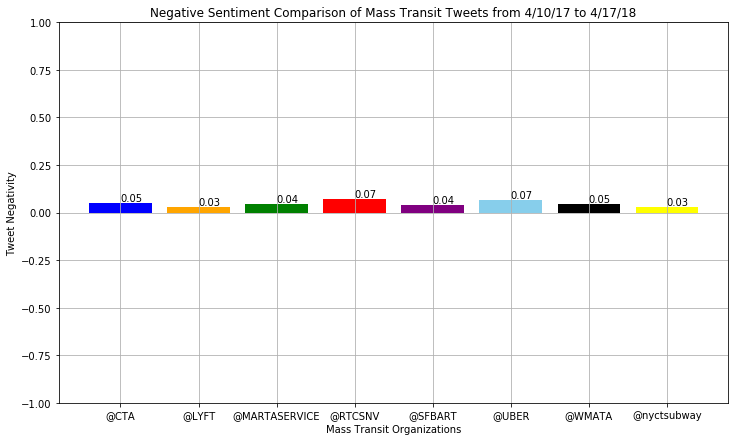

In [12]:
# plot neutral sentiment

plt.figure(figsize = (12,7))
plt.ylim(-1,1)
plt.grid()

colors = ["blue", "orange", "green","red","purple","skyblue","black","yellow"]
x_axis = np.arange(len(neu_df))
xlabels = neu_df.index
count = 0

for neu in neu_df:
    plt.text(count, neu+.01, str(round(neu,2)))
    count = count + 1
    
plt.bar(x_axis, neu_df, tick_label = xlabels, color = colors)
#Set title, x axis label, and y axis label.

plt.title("Neutral Sentiment Comparison of Mass Transit Tweets from 4/10/17 to 4/17/18")
plt.xlabel("Mass Transit Organizations")
plt.ylabel("Tweet Neutrality")
plt.savefig("Neutral_Sentiment_on_Mass_Trans.png")
plt.show()

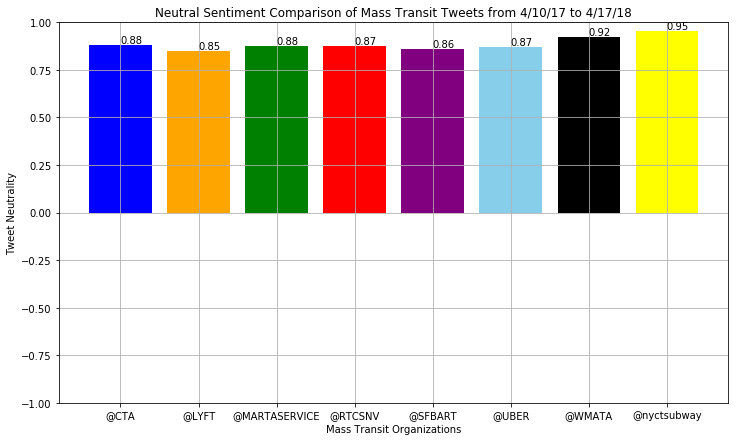

In [13]:
# plot negative sentiments

plt.figure(figsize = (12,7))
plt.ylim(-1,1)
plt.grid()

colors = ["blue", "orange", "green","red","purple","skyblue","black","yellow"]
x_axis = np.arange(len(neg_df))
xlabels = neg_df.index
count = 0

for neg in neg_df:
    plt.text(count, neg+.01, str(round(neg,2)))
    count = count + 1
    
plt.bar(x_axis, neg_df, tick_label = xlabels, color = colors)
#Set title, x axis label, and y axis label.

plt.title("Negative Sentiment Comparison of Mass Transit Tweets from 4/10/17 to 4/17/18")
plt.xlabel("Mass Transit Organizations")
plt.ylabel("Tweet Negativity")
plt.savefig("Negative_Sentiment_on_Mass_Trans.png")
plt.show()